In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing data
df = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\df_small_updated.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9050078 entries, 0 to 32404846
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_freq_fla

In [4]:
path = r"C:\Users\Windows\Instacart Basket Analysis"

In [5]:
df['department'].value_counts(dropna = False)

department
produce            2657998
dairy eggs         1516263
snacks              809485
beverages           752229
frozen              617774
pantry              519473
bakery              327677
canned goods        294967
deli                292344
dry goods pasta     239748
household           203287
meat seafood        196438
breakfast           196290
personal care       123280
babies              121398
international        74644
alcohol              41449
pets                 27023
missing              18826
other                 9905
bulk                  9580
Name: count, dtype: int64

In [6]:
# create a pet ownership profiling variable
df.loc[df['department'] == 'pets', 'pet_status'] = 'Pet Owner'
df.loc[df['department'] != 'pets', 'pet_status'] = 'Not a Pet Owner'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9050078 entries, 0 to 32404846
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_freq_fla

In [8]:
#changing variable type to reduce memory usage
df['pet_status']=df['pet_status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9050078 entries, 0 to 32404846
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_freq_fla

In [9]:
df['pet_status'].value_counts(dropna = False)

pet_status
Not a Pet Owner    9023055
Pet Owner            27023
Name: count, dtype: int64

C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\222873633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dept_overall = sns.countplot(x='department', data=df, palette='colorblind')
C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\222873633.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dept_overall.set_xticklabels(dept_overall.get_xticklabels(), rotation=45, horizontalalignment='right')


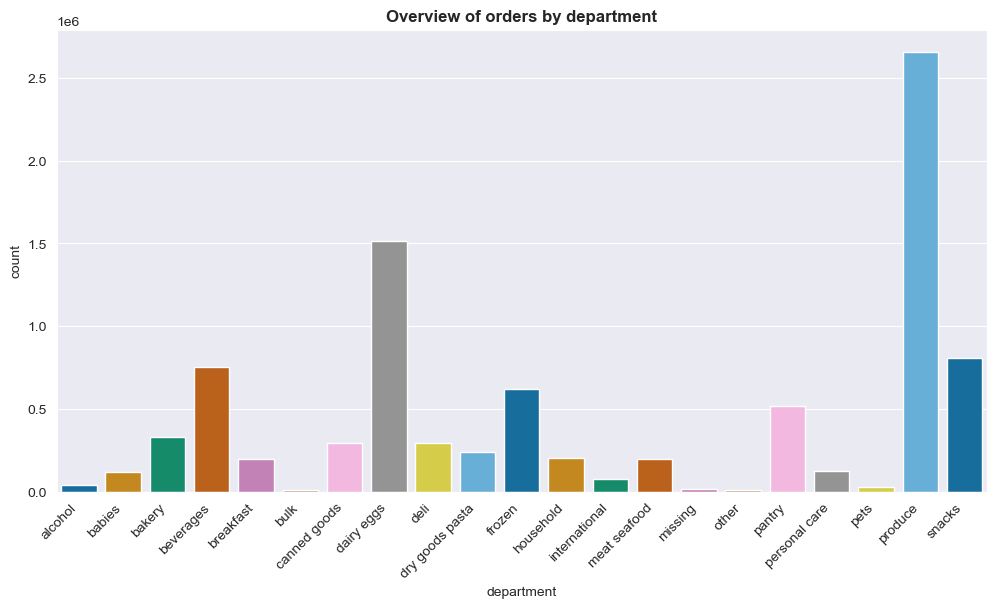

In [10]:
# Overview of departments - What departments are the most popular overall?
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
dept_overall = sns.countplot(x='department', data=df, palette='colorblind')
dept_overall.set_xticklabels(dept_overall.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of orders by department', fontweight = 'bold')
dept_overall.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_overall.png'))



In [11]:
# Top 5 departments by order

value_counts = df['department'].value_counts()

In [12]:
# converting value_counts to dataframe
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['Department', 'Counts'] 

In [13]:
top_dept_by_count = df_value_counts_reset.head()

In [14]:
top_dept_by_count

,Department,Counts
0,produce,2657998
1,dairy eggs,1516263
2,snacks,809485
3,beverages,752229
4,frozen,617774


In [15]:
# From these top 5 departments by count, what are the top 10 products? We will need to subset all entries 
filter_1 = df['department'].isin(['produce', 'dairy eggs', 'snacks','beverages','frozen'])

In [16]:
top_dept_subset = df[filter_1]

In [17]:
top_dept_subset.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,date_joined,n_dependants,fam_status,income,Region,age_group,income_group,department,dependant_group,pet_status
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,Senior,low income,snacks,Yes,Not a Pet Owner
6,4913,Table Water Crackers,19,19,4.4,894221,138,23,5,13,...,8/1/2019,1,married,49620,Midwest,Senior,low income,snacks,Yes,Not a Pet Owner
12,8048,Packaged Grape Tomatoes,4,4,11.4,1421595,138,3,2,9,...,8/1/2019,1,married,49620,Midwest,Senior,low income,produce,Yes,Not a Pet Owner
13,10473,Half And Half Cream,16,16,7.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,Midwest,Senior,low income,dairy eggs,Yes,Not a Pet Owner
19,10473,Half And Half Cream,16,16,7.0,2823056,138,8,6,14,...,8/1/2019,1,married,49620,Midwest,Senior,low income,dairy eggs,Yes,Not a Pet Owner


In [18]:
# Find top 10 products by count of orders in the top 5 departments
prod_value_counts = top_dept_subset['product_name'].value_counts()

In [19]:
prod_value_counts.head(10)

product_name
Banana                    132613
Bag of Organic Bananas    107300
Organic Strawberries       75198
Organic Baby Spinach       67760
Organic Hass Avocado       60886
Organic Avocado            49337
Large Lemon                41985
Strawberries               39759
Limes                      39636
Organic Whole Milk         39105
Name: count, dtype: int64

In [20]:
# Find top 10 product names overall 
top_prods = df['product_name'].value_counts()

In [21]:
top_prods

product_name
Banana                                                     132613
Bag of Organic Bananas                                     107300
Organic Strawberries                                        75198
Organic Baby Spinach                                        67760
Organic Hass Avocado                                        60886
                                                            ...  
Smoked Basmati Rice                                             0
Urban Bourbon Ice Cream                                         0
Smoke Roasted Wild Sockeye Asian Sesame Salmon                  0
Original 2/$1 Sunflower Seeds                                   0
Organic Life Vitamins Raspberry Cranberry Flavor Liquid         0
Name: count, Length: 49661, dtype: int64

In [22]:
# converting value_counts to dataframe
top_prods_value_counts = pd.DataFrame(top_prods)
top_prods_value_counts_reset = top_prods_value_counts.reset_index()
top_prods_value_counts_reset.columns = ['Product Name', 'Counts'] 

In [23]:
top_prods_value_counts_reset.head(10)

,Product Name,Counts
0,Banana,132613
1,Bag of Organic Bananas,107300
2,Organic Strawberries,75198
3,Organic Baby Spinach,67760
4,Organic Hass Avocado,60886
5,Organic Avocado,49337
6,Large Lemon,41985
7,Strawberries,39759
8,Limes,39636
9,Organic Whole Milk,39105


C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\2148744466.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dept_overview_by_region.set_xticklabels(dept_overview_by_region.get_xticklabels(), rotation=45, horizontalalignment='right')


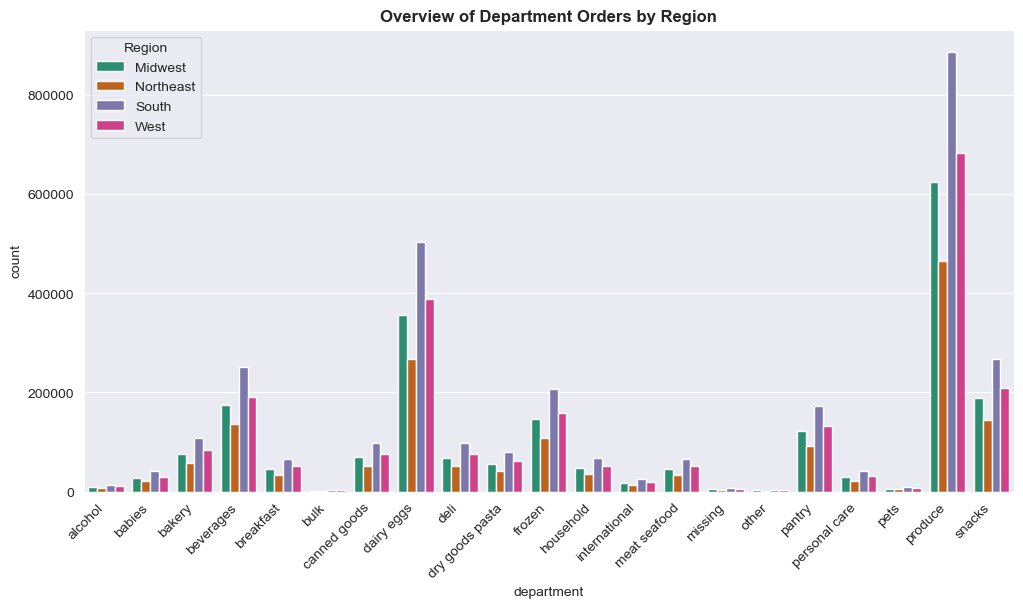

In [24]:
# Overview of department orders by region

plt.figure(figsize=(12, 6))
dept_overview_by_region = sns.countplot(x='department', data=df, hue = 'Region', palette='Dark2')
dept_overview_by_region.set_xticklabels(dept_overview_by_region.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders by Region', fontweight = 'bold')
dept_overview_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_overview_by_region.png'))


#### Overall, the most popular categories are:  produce, dairy eggs , snacks, beverages  and frozen food.

C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\610804196.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  dept_overview_by_age.set_xticklabels(dept_overview_by_age.get_xticklabels(), rotation=45, horizontalalignment='right')


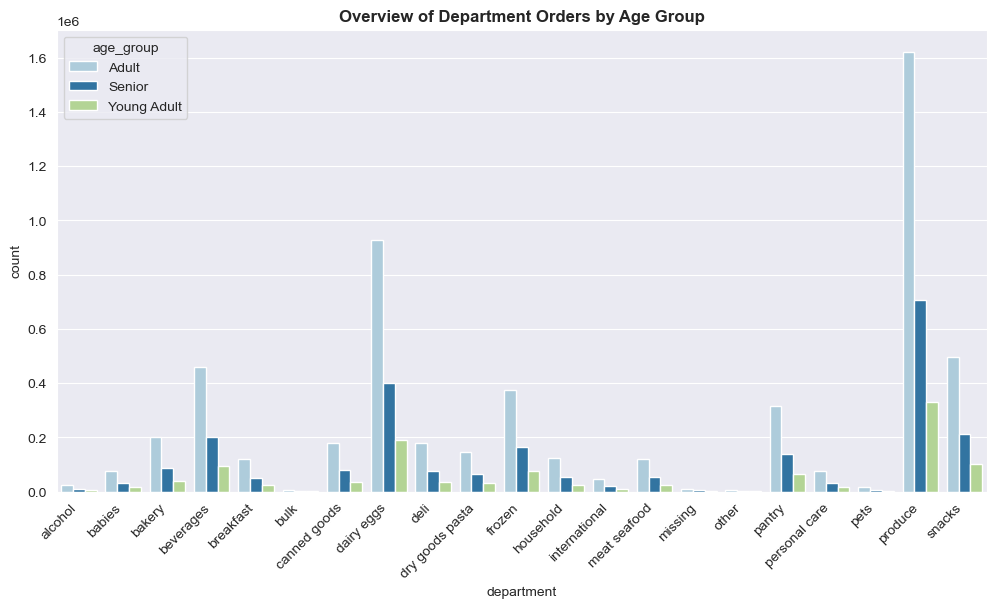

In [25]:
# # What are the most popular categories by age group?
plt.figure(figsize=(12, 6))
dept_overview_by_age = sns.countplot(x='department', data=df, hue = 'age_group', palette='Paired')
dept_overview_by_age.set_xticklabels(dept_overview_by_age.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders by Age Group', fontweight = 'bold')
dept_overview_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_overview_by_age.png'))


####  By age group, aduls drive most of the orders across all categories. The top 5 categories are produce, dairy eggs, snacks, beverages and frozen food.

C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\3908514136.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dept_overview_by_income.set_xticklabels(dept_overview_by_income.get_xticklabels(), rotation=45, horizontalalignment='right')


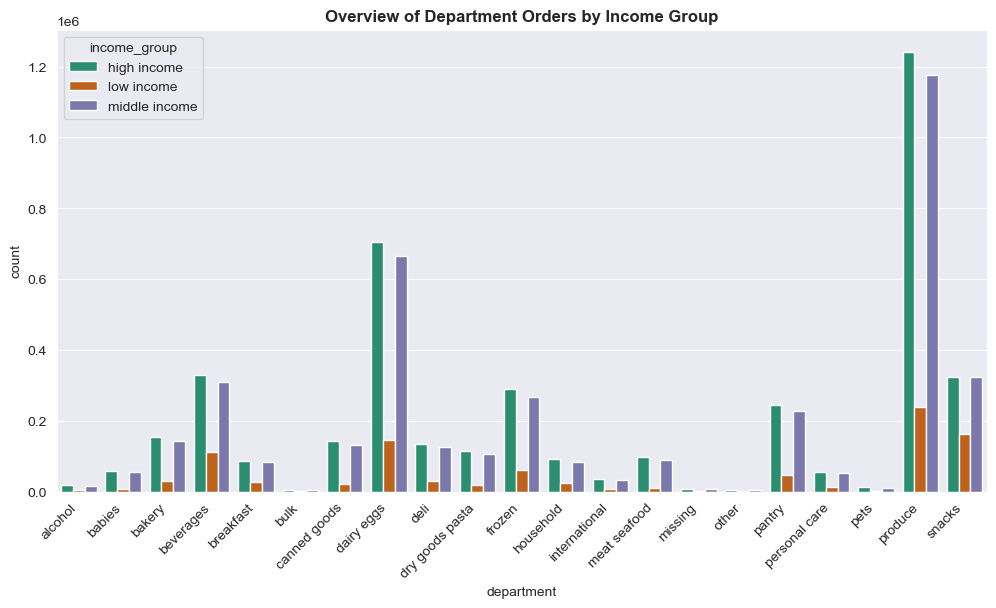

In [26]:
# What are the most popular categories by income group?

plt.figure(figsize=(12, 6))
dept_overview_by_income = sns.countplot(x='department', data=df, hue = 'income_group', palette='Dark2')
dept_overview_by_income.set_xticklabels(dept_overview_by_income.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders by Income Group', fontweight = 'bold')
dept_overview_by_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_overview_by_income.png'))


####  For both high-income and middle-income customers,  dairy eggs and produce are two departments that will be further examined to look at the top products in each category. 

C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\2462046545.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dept_overview_by_fam_status.set_xticklabels(dept_overview_by_fam_status.get_xticklabels(), rotation=45, horizontalalignment='right')


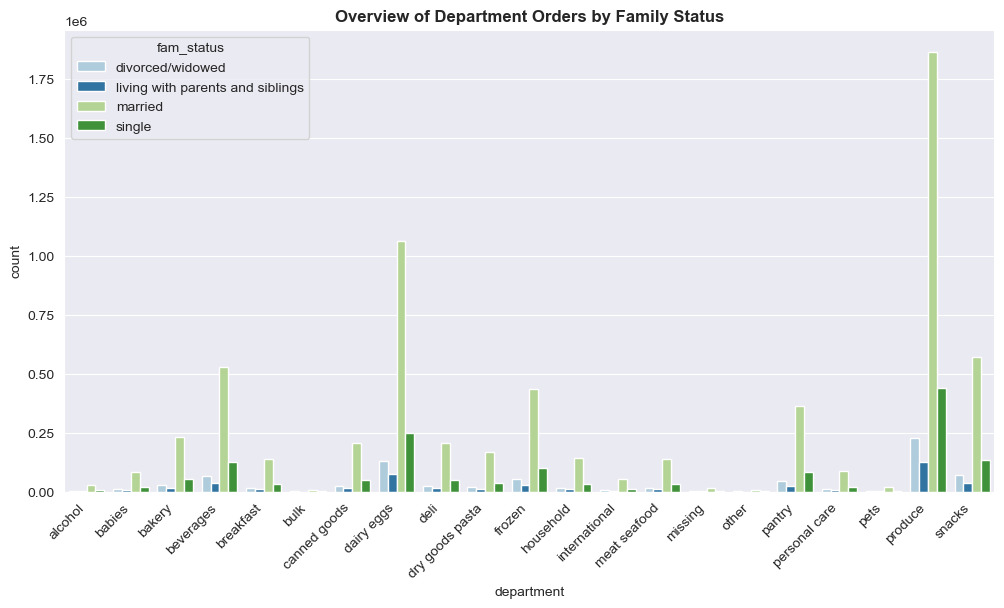

In [27]:
# What are the most popular categories by family status?

plt.figure(figsize=(12, 6))
dept_overview_by_fam_status = sns.countplot(x='department', data=df, hue = 'fam_status', palette='Paired')
dept_overview_by_fam_status.set_xticklabels(dept_overview_by_fam_status.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders by Family Status', fontweight = 'bold')
dept_overview_by_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_overview_by_fam_status.png'))

#### By Family Status, the majority of the orders across all categories come from married customers. Produce and Dairy Eggs are the most in demand. 

C:\Users\Windows\AppData\Local\Temp\ipykernel_16692\3676345162.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  dept_overview_by_dep.set_xticklabels(dept_overview_by_dep.get_xticklabels(), rotation=45, horizontalalignment='right')


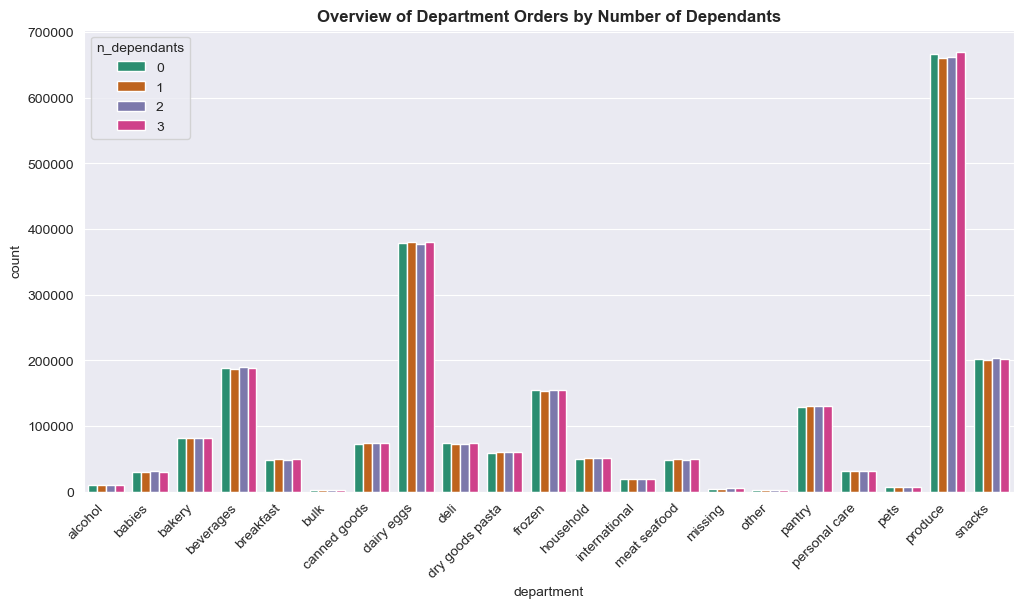

In [28]:
# What are the most popular categories by number of dependants? 

plt.figure(figsize=(12, 6))
dept_overview_by_dep = sns.countplot(x='department', data=df, hue = 'n_dependants', palette='Dark2')
dept_overview_by_dep.set_xticklabels(dept_overview_by_dep.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders by Number of Dependants', fontweight = 'bold')
dept_overview_by_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_overview_by_dep.png'))

#### By number of dependants, the count of orders across all departments is consistent for each group of dependants. This means that segment of customers by # of dependants may be less informative.